In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e24/sample_submission.csv
/kaggle/input/playground-series-s3e24/train.csv
/kaggle/input/playground-series-s3e24/test.csv


In [2]:
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from xgboost import plot_importance

pd.set_option('display.max_columns',None)

In [3]:
df_submission=pd.read_csv('/kaggle/input/playground-series-s3e24/sample_submission.csv')
df_test=pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv')
df_train=pd.read_csv('/kaggle/input/playground-series-s3e24/train.csv')

In [4]:
df_train.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1


In [5]:
df_test.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,89,107,200,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,72,93,172,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,75,92,161,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,62,91,213,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,94,79,170,100,39,123,16.5,1,1.0,30,39,27,1


# **Dummy Model**

In [6]:
X_train=df_train.drop('smoking', axis=1)
y_train=df_train[['smoking']].copy()

In [7]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [8]:
# make predictions for test data
y_pred = model.predict(df_test)

In [9]:
df_pred=pd.DataFrame(y_pred, columns=['smoking'])

In [10]:
df_submit=df_test[['id']].copy()

In [11]:
df_submit['smoking']=df_pred['smoking'].values

In [12]:
df_submit.head()

,id,smoking
0,159256,1
1,159257,0
2,159258,1
3,159259,0
4,159260,1


In [13]:
df_submit.to_csv('submission_metha_1.csv', index=False)

# **EDA**

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

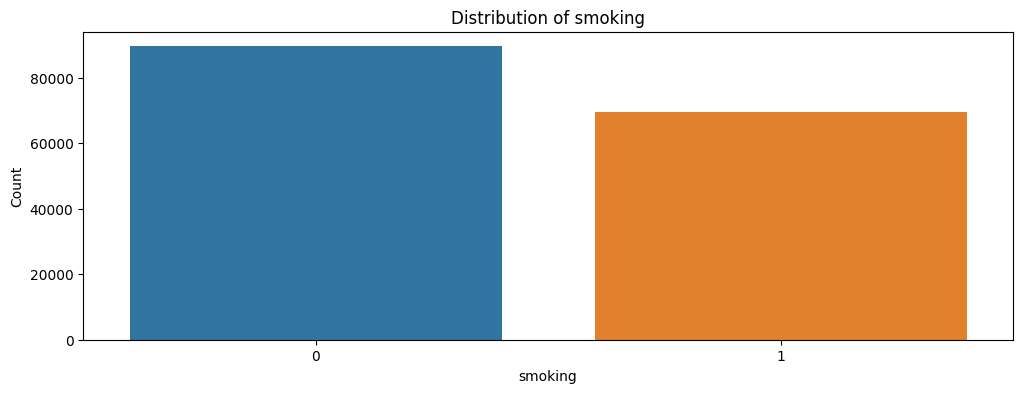

In [15]:
# Countplot for the target variable 'defects'
plt.figure(figsize=(12, 4))
sns.countplot(data=df_train, x='smoking')
plt.title('Distribution of smoking')
plt.xlabel('smoking')
plt.ylabel('Count')
plt.show()

# **Feature Engineering**

In [16]:
X_train=df_train.drop('smoking', axis=1)
y_train=df_train[['smoking']].copy()

In [17]:
sm = SMOTE(random_state = 42)
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
X_train = pd.DataFrame(X_train_oversampled, columns=X_train.columns)

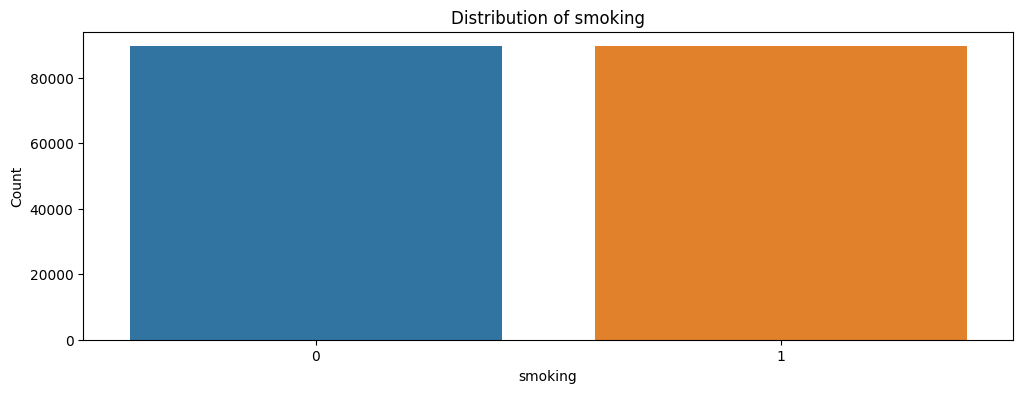

In [18]:
# Countplot for the target variable 'smoking' after smote
plt.figure(figsize=(12, 4))
sns.countplot(data=y_train_oversampled, x='smoking')
plt.title('Distribution of smoking')
plt.xlabel('smoking')
plt.ylabel('Count')
plt.show()

In [19]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train_oversampled, y_train_oversampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [20]:
# feature importance
print(model.feature_importances_)

[0.00599055 0.03622292 0.48454952 0.03003474 0.00752095 0.02607152
 0.02139012 0.0068914  0.00786741 0.00989836 0.00944372 0.00754385
 0.01154292 0.03063953 0.00890121 0.01753264 0.11314683 0.00671814
 0.05687746 0.01210368 0.01425785 0.05666857 0.01818609]


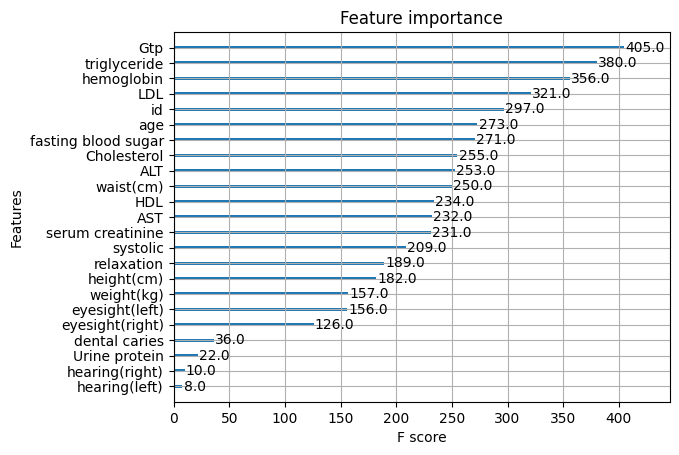

In [21]:
# plot feature importance
plot_importance(model)
plt.show()

In [22]:
X_train_oversampled_new=X_train_oversampled.drop(['dental caries', 'Urine protein', 'hearing(right)', 'hearing(left)'], axis=1)

# **Model**

In [23]:
model_xgboost = XGBClassifier()
model_xgboost.fit(X_train_oversampled_new, y_train_oversampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [24]:
df_test_new=df_test.drop(['dental caries', 'Urine protein', 'hearing(right)', 'hearing(left)'], axis=1)
y_pred_xgboost = model_xgboost.predict(df_test_new)
df_y_pred_xgboost=pd.DataFrame(y_pred_xgboost, columns=['smoking'])

In [25]:
df_submit_xgboost=df_test[['id']].copy()
df_submit_xgboost['smoking']=df_y_pred_xgboost['smoking'].values
df_submit_xgboost.to_csv('submission_metha_xgboost.csv', index=False)